In [6]:
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
%matplotlib inline

In [7]:
weekly_prices = pd.read_csv("data/nzu-weekly-prices-data.csv")

In [8]:
weekly_prices.head()

,date,price,reference
0,2010/05/14,17.75,http://www.carbonnews.co.nz/story.asp?storyID=...
1,2010/05/21,17.50,http://www.carbonnews.co.nz/story.asp?storyID=...
2,2010/05/29,17.50,http://www.carbonnews.co.nz/story.asp?storyID=...
3,2010/06/11,17.00,http://www.carbonnews.co.nz/story.asp?storyID=...
4,2010/06/25,17.75,http://www.carbonnews.co.nz/story.asp?storyID=...


In [9]:
weekly_prices.dtypes

date          object
price        float64
reference     object
dtype: object

<AxesSubplot:>

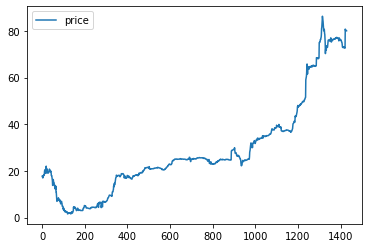

In [10]:
weekly_prices.plot()

In [11]:
weekly_prices['date'] = pd.to_datetime(weekly_prices['date'])

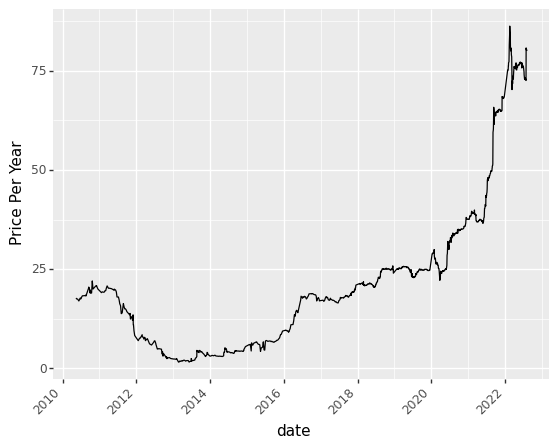

<ggplot: (151341421812)>

In [12]:
(ggplot(weekly_prices) 
 + geom_line(aes('date', 'price')) 
 + scale_x_datetime(breaks=date_breaks('2 Year'), labels=date_format('%Y'))
 + labs(y='Price Per Year')
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)



In [13]:
nzcf_planted = pd.read_csv("data/nzcfPlantingMaster.csv")

In [14]:
nzcf_planted.head()

,id,forest_id,f_name,plantclass,plantyear,feature,ets_class,ets_class_desc,layer,path_,caa_status,area_ha
0,1,F_208,Pine Hill,planting area,2020,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,331.82
1,2,F_203,Kura,planting area,2020,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,110.26
2,3,F_204,Pukemanu,planting area,2020,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,213.94
3,4,F_207,Range Road,planting area,2019,Eligible Plantation Area,Post 1989 Eligible,NaN,Range_Road_Planting_Area,C:\Users\LeoPaolini\OneDrive - NZ Carbon Farmi...,Active,300.34
4,5,F_198,Oporae Station,planting area,2020,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,722.53


In [15]:
nzcf_planted['plantyear'] = pd.to_datetime(nzcf_planted['plantyear'], format = "%Y").dt.strftime('%Y-%m-%d')

In [16]:
nzcf_planted.head()

,id,forest_id,f_name,plantclass,plantyear,feature,ets_class,ets_class_desc,layer,path_,caa_status,area_ha
0,1,F_208,Pine Hill,planting area,2020-01-01,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,331.82
1,2,F_203,Kura,planting area,2020-01-01,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,110.26
2,3,F_204,Pukemanu,planting area,2020-01-01,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,213.94
3,4,F_207,Range Road,planting area,2019-01-01,Eligible Plantation Area,Post 1989 Eligible,NaN,Range_Road_Planting_Area,C:\Users\LeoPaolini\OneDrive - NZ Carbon Farmi...,Active,300.34
4,5,F_198,Oporae Station,planting area,2020-01-01,Eligible Plantation Area,Post 1989 eligible,NaN,NaN,NaN,Active,722.53


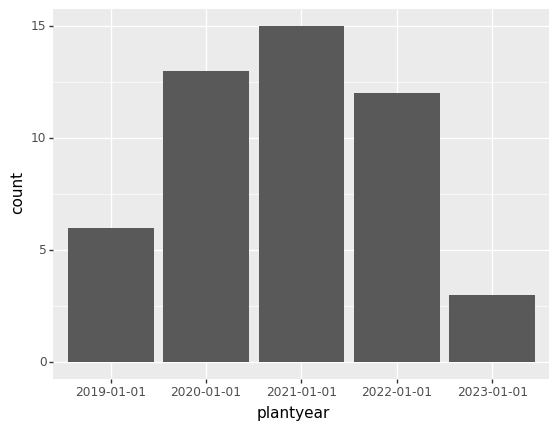

<ggplot: (151341413172)>

In [17]:
(ggplot(nzcf_planted) 
 + geom_bar(aes(x='plantyear', fill='area_ha'))
 #+ labs(y='Planted ha per year')
 #+ theme(axis_text_x=element_text(rotation=35, hjust=1))
)



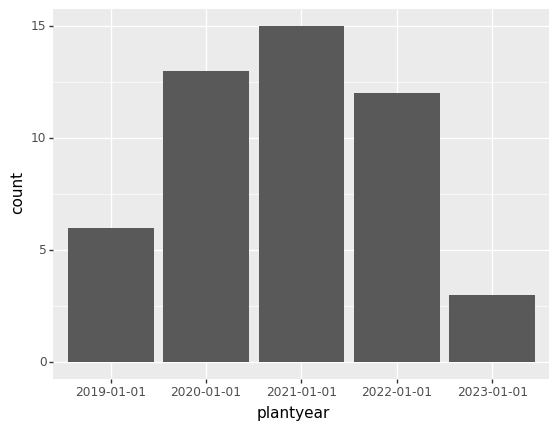

<ggplot: (151341388102)>

In [18]:
(ggplot()
 + geom_bar(aes(x='plantyear'), data=nzcf_planted)
)

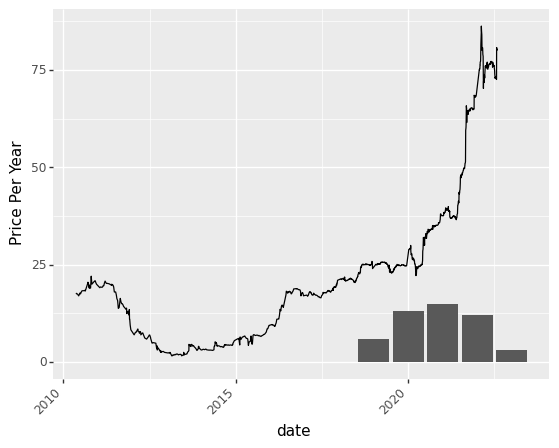

<ggplot: (151342540797)>

In [21]:
(ggplot(weekly_prices)
 + geom_line(aes('date', 'price')) 
 + geom_bar(aes(x='plantyear'), data=nzcf_planted)
 + scale_x_datetime(breaks=date_breaks('5 Year'), labels=date_format('%Y'))
 + labs(y='Price Per Year')
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)



In [25]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))
ax.plot(xdata, ydata, label='Plotted data')

xold = np.arange(0, 11, 0.2)
# fake data set relating x coordinate to another data-derived coordinate.
# xnew must be monotonic, so we sort...
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)

ax.plot(xold[3:], xnew[3:], label='Transform data')
ax.set_xlabel('X [m]')
ax.legend()


def forward(x):
    return np.interp(x, xold, xnew)


def inverse(x):
    return np.interp(x, xnew, xold)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('$X_{other}$')

plt.show()

NameError: name 'plt' is not defined